# Project 1:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input
from tensorflow import keras
from keras import models, optimizers
from sklearn.model_selection import train_test_split

In [5]:
# Please add corresponding paths to Train images and labels files
# Please mount google drive if necessary or upload files to runtime folder
Image_path = "Path to Train images data"
label_path = "path to Train labels data"
images = np.array(pickle.load(open(Image_path, 'rb')))
labels = np.array(pickle.load(open(label_path, 'rb')))

In [6]:
print(f"images shape before: {images.shape}")
images = images.reshape(-1, 28, 28, 1)/255.0
print(f"images shape after reshaping: {images.shape}")
print(f"labels shape: {labels.shape}")

images shape before: (60000, 28, 28)
images shape after reshaping: (60000, 28, 28, 1)
labels shape: (60000,)


Epoch 1/20
675/675 [==============================] - 15s 13ms/step - loss: 2.4566 - accuracy: 0.2330 - val_loss: 1.9521 - val_accuracy: 0.3123
Epoch 2/20
675/675 [==============================] - 9s 13ms/step - loss: 1.6628 - accuracy: 0.4227 - val_loss: 2.1537 - val_accuracy: 0.3771
Epoch 3/20
675/675 [==============================] - 9s 13ms/step - loss: 1.3103 - accuracy: 0.5520 - val_loss: 1.4911 - val_accuracy: 0.4887
Epoch 4/20
675/675 [==============================] - 8s 13ms/step - loss: 1.2075 - accuracy: 0.5874 - val_loss: 1.1199 - val_accuracy: 0.6159
Epoch 5/20
675/675 [==============================] - 9s 13ms/step - loss: 1.1295 - accuracy: 0.6146 - val_loss: 1.2423 - val_accuracy: 0.5910
Epoch 6/20
675/675 [==============================] - 9s 13ms/step - loss: 1.0776 - accuracy: 0.6332 - val_loss: 1.0760 - val_accuracy: 0.6481
Epoch 7/20
675/675 [==============================] - 9s 13ms/step - loss: 1.0469 - accuracy: 0.6430 - val_loss: 1.0070 - val_accuracy: 0.656

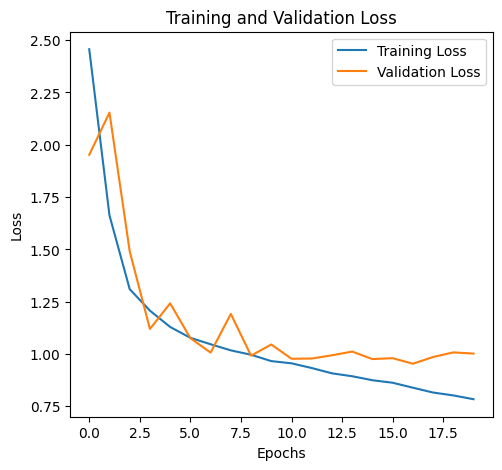

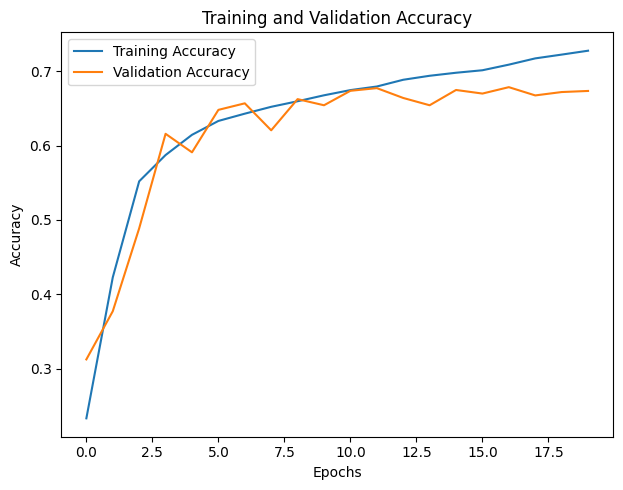

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(images, labels,
                                                    test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2, random_state=45)

# Defining CNN model to train for noisy images:
model = models.Sequential([
  Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
  BatchNormalization(),
  Conv2D(32,(3,3),padding='same',activation='relu'),
  BatchNormalization(),
  Conv2D(32,(5,5),strides=2,padding='same',activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  Conv2D(64,(3,3),padding='same',activation='relu'),
  BatchNormalization(),
  Conv2D(64,(3,3),padding='same',activation='relu'),
  BatchNormalization(),
  Conv2D(64,(5,5),strides=2,padding='same',activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  Flatten(),
  Dense(500, activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  Dense(10, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(0.001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train with validation values and evaluate on test set
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_val, y_val))

loss_test, accuracy_test = model.evaluate(X_test, y_test)

# Show data on graphs
# Epochs vs Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Epochs vs Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
# Save the model
model.save("/Rahaan_Gandhi_434007427_Project1.h5")

## Testing

In [12]:
from tensorflow.keras import models
import pickle
import tensorflow as tf

# Below pls add proper paths to access trained models and the corresponding test data
model = models.load_model("/Rahaan_Gandhi_434007427_Project1.h5")
test_labels = pickle.load(open("./636_project1_test_labels", 'rb'))
test_images = pickle.load(open("./636_project1_test_images", 'rb'))

# Include your data preprocessing code if applicable
#Pre Process data by turning given data from tensors to numpy array
# Reshape image pixel data to (x, 28,28,1) size and then divide by 255 to normalize data
#Run below code only if given test data is tensors
test_labels = np.array(test_labels)
test_images = np.array(test_images)
test_images = images.reshape(-1, 28, 28, 1)/255.0
# Include your data preprocessing code if applicable

test_loss, test_acc = model.evaluate(test_images, test_labels)
your_score = round(test_acc*1000) / 10
print(f"Your Score: {your_score}")

1875/1875 [==============================] - 82s 44ms/step - loss: 0.6208 - accuracy: 0.7938
Your Score: 79.4
